In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

sc.logging.print_header()

/home/oppenheimer/miniforge3/envs/spatial9/lib/python3.12/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/oppenheimer/miniforge3/envs/spatial9/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.4 anndata==0.9.2 umap==0.5.7 numpy==1.26.4 scipy==1.14.1 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.13


In [3]:
adata = sq.read.vizgen(path="../data/vizgen", 
                       counts_file="datasets-mouse_brain_map-BrainReceptorShowcase-Slice2-Replicate3-cell_by_gene_S2R3.csv", 
                       meta_file="datasets-mouse_brain_map-BrainReceptorShowcase-Slice2-Replicate3-cell_metadata_S2R3.csv")
adata

AnnData object with n_obs × n_vars = 85958 × 483
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y'
    uns: 'spatial'
    obsm: 'blank_genes', 'spatial'

In [ ]:
# Calculate quality control metrics
sc.pp.calculate_qc_metrics(adata, percent_top=(50, 100, 200, 300), inplace=True)

In [6]:
adata

AnnData object with n_obs × n_vars = 85958 × 483
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_300_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'blank_genes', 'spatial'

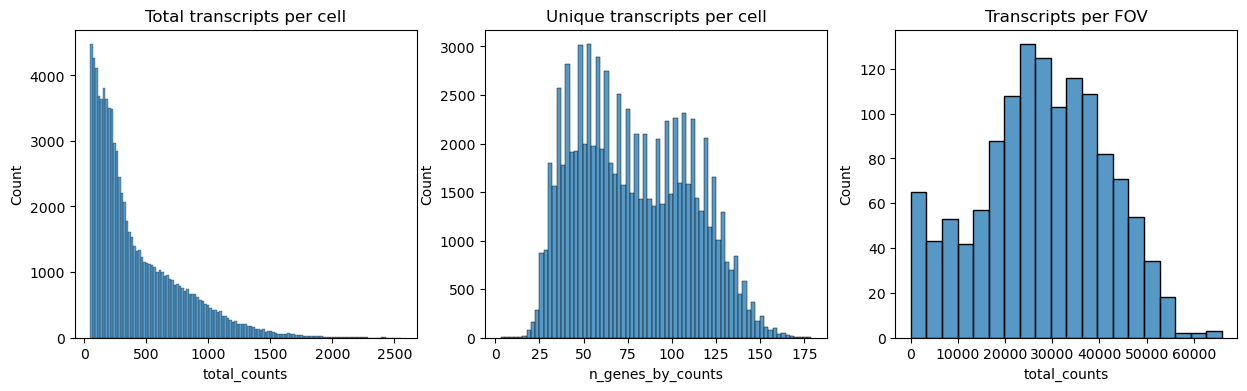

In [ ]:
# Plot the distribution of total transcripts per cell, unique transcripts per cell and transcripts per FOV
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])

axs[1].set_title("Unique transcripts per cell")
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[1])

axs[2].set_title("Transcripts per FOV")
sns.histplot(adata.obs.groupby("fov").sum()["total_counts"], kde=False, ax=axs[2])

In [10]:
# All cells that do not contain at least 10 transcripts are filtered out
sc.pp.filter_cells(adata, min_counts=10)
adata

AnnData object with n_obs × n_vars = 85958 × 483
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_300_genes', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'blank_genes', 'spatial'

In [ ]:
# Scanpy workflow
sc.pp.normalize_total(adata, inplace=True)  # Normalize counts per cell
# sc.pp.highly_variable_genes(adata)  # there are only 483 genes
sc.pp.log1p(adata)  # Logarithmize
sc.pp.pca(adata)  # Principal component analysis
sc.pp.neighbors(adata)  # Compute a neighborhood graph
sc.tl.umap(adata)  # Embed the neighborhood graph of the data
sc.tl.leiden(adata, resolution=0.5)  # Cluster the cells into subgroups


/tmp/ipykernel_612070/3766719321.py:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)  # Cluster the cells into subgroups


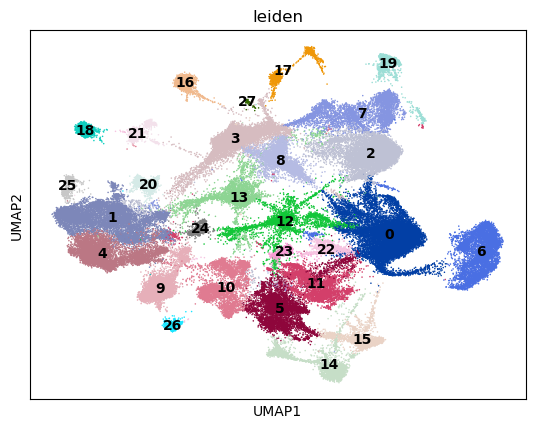

In [12]:
sc.pl.umap(adata, color="leiden", legend_loc='on data', size=5, wspace=0.4)


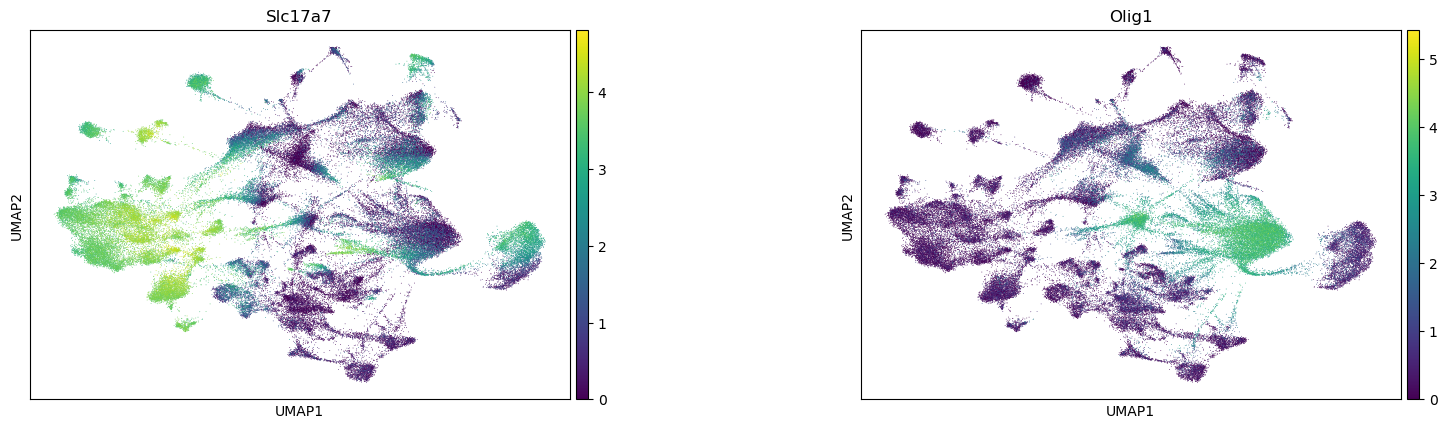

In [13]:
sc.pl.umap(adata, color=["Slc17a7", "Olig1"], wspace=0.4)


/home/oppenheimer/miniforge3/envs/spatial9/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


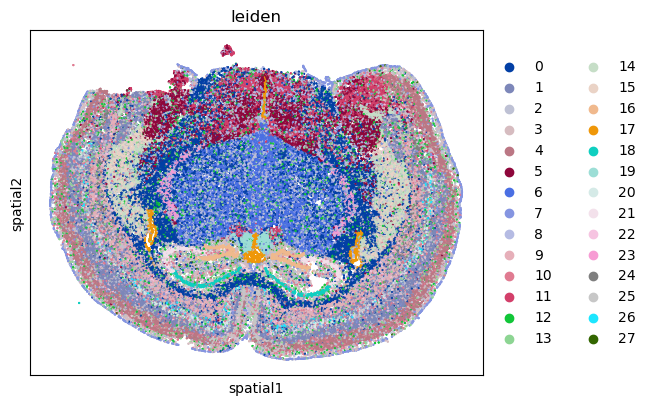

In [14]:
sq.pl.spatial_scatter(adata, shape=None, color="leiden", wspace=0.4)


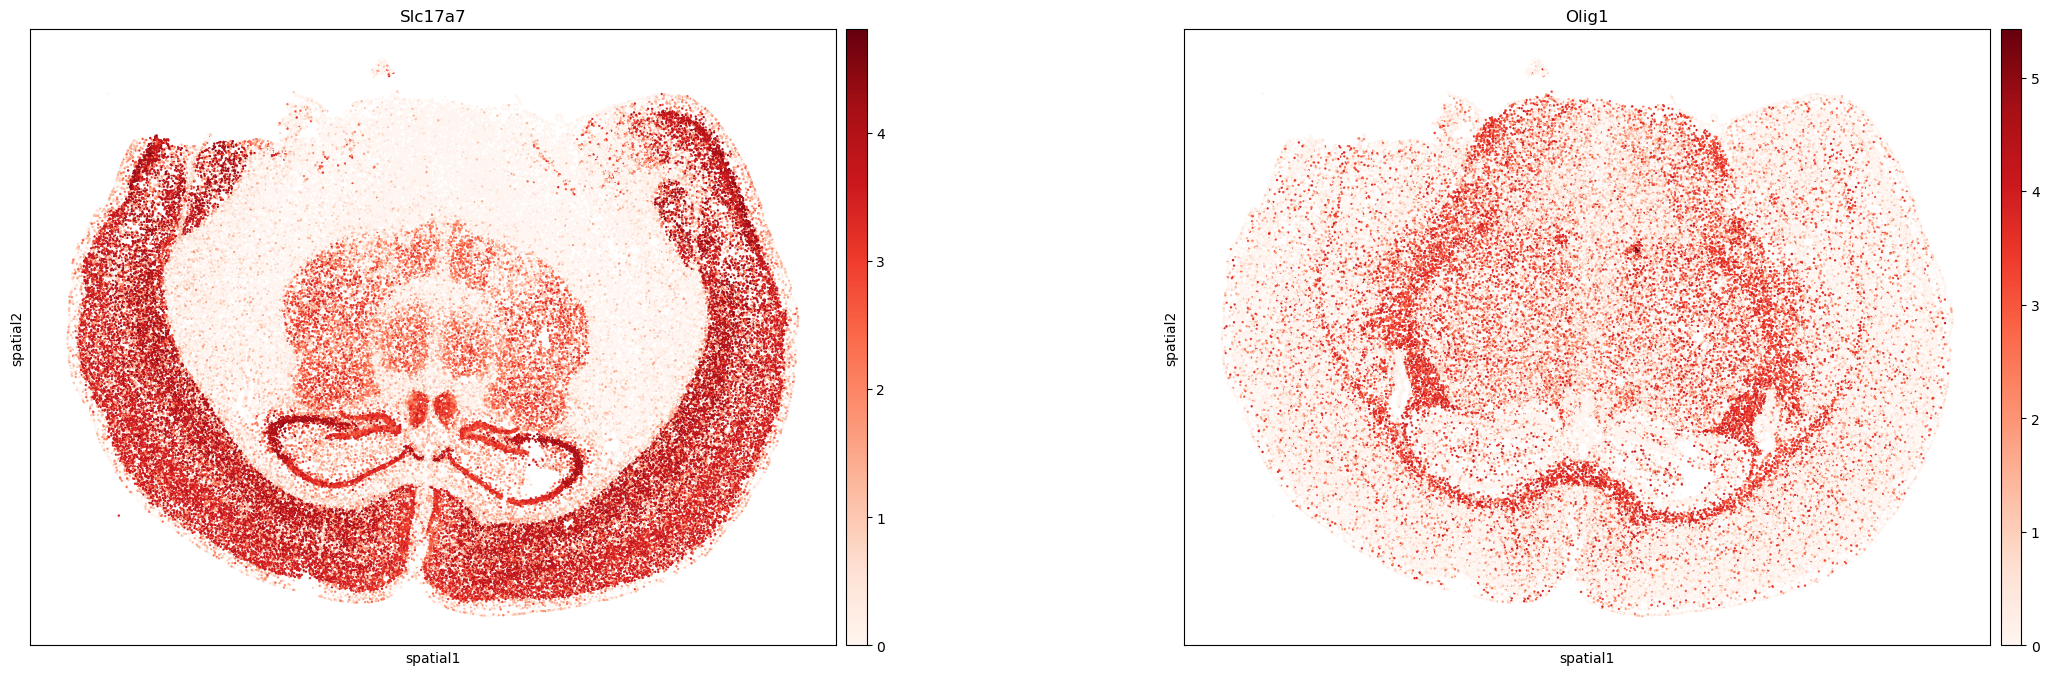

In [15]:
sq.pl.spatial_scatter(adata, color=["Slc17a7", "Olig1"], size=15, cmap="Reds", img=False, figsize=(12, 8))  # adata.var_names


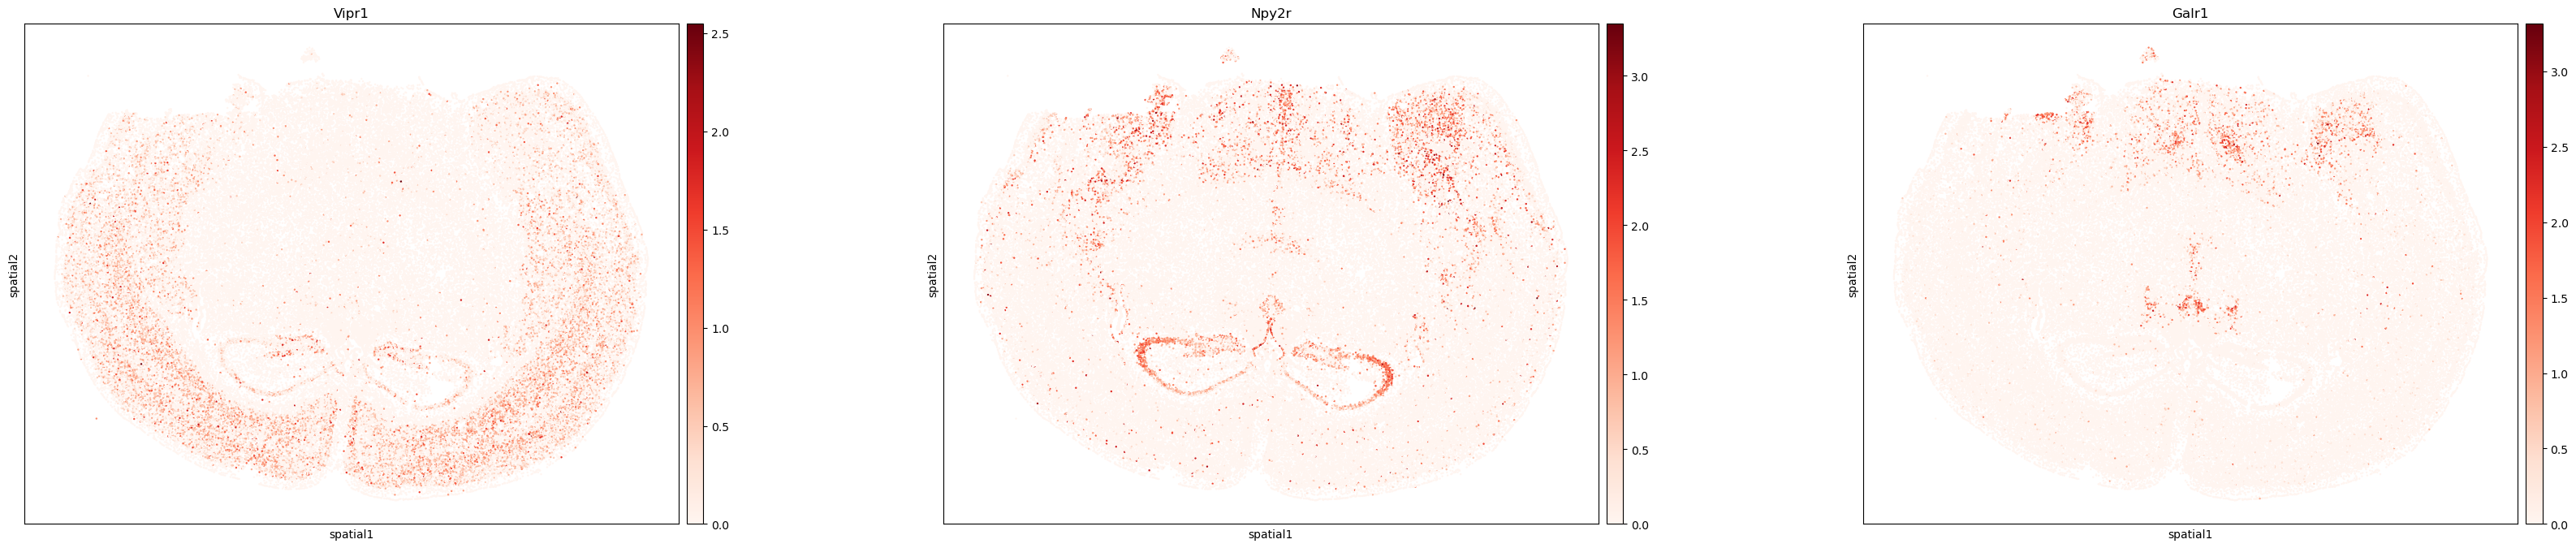

In [16]:
sq.pl.spatial_scatter(adata, color=["Vipr1", "Npy2r", "Galr1"], size=15, cmap="Reds", img=False, figsize=(12, 8))